In [2]:
import sys
print(sys.executable)

e:\virtual_environment\venv\Scripts\python.exe


# **Giai đoạn 1: Nền tảng cơ bản**

### 1.Tensor là gì và tại sao cần học về tensor: ###
- Tensor là cấu trúc dữ liệu cơ bản trong PyTorch, tương tự như NumPy array nhưng được tối ưu cho deep learning
- Tensor có thể chạy trên GPU để tăng tốc độ tính toán
- Tensor tự động tính được đạo hàm (gradient) - rất quan trọng trong quá trình huấn luyện neural network

### 2.Các cách tạo tensor cơ bản: ###

In [3]:
import torch
import numpy as np

# Tạo tensor từ list
x = torch.tensor([1, 2, 3, 4])

# Tạo tensor với giá trị ngẫu nhiên
random_tensor = torch.rand(size=(3, 4))
print(random_tensor)

# Tạo tensor toàn số 0 hoặc 1
zeros = torch.zeros(size=(3, 4))
ones = torch.ones(size=(3, 4))
eye = torch.eye(3)
print(zeros)
print(ones)
print(eye)

# Tạo tensor với giá trị tuần tự
range_tensor = torch.arange(start=0, end=10, step=2)
linspace_tensor = torch.linspace(start=0.1, end=1, steps=10)
print(range_tensor)
print(linspace_tensor)

# Tạo tensor với shape giống tensor khác
x_ones = torch.ones_like(x)
x_zeros = torch.zeros_like(x)
print(x_ones)
print(x_zeros)


tensor([[0.4687, 0.5336, 0.5818, 0.4117],
        [0.7924, 0.8372, 0.3551, 0.9943],
        [0.8983, 0.5106, 0.8574, 0.9261]])
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])
tensor([0, 2, 4, 6, 8])
tensor([0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000, 0.9000,
        1.0000])
tensor([1, 1, 1, 1])
tensor([0, 0, 0, 0])


### 3.Các thuộc tính quan trọng của tensor: ###
- shape: kích thước của tensor
- dtype: kiểu dữ liệu (float32, int64,...)
- device: tensor được lưu ở đâu (CPU hay GPU)

In [4]:
# Ví dụ kiểm tra thuộc tính
print(x.shape)      # Kích thước
print(x.dtype)      # Kiểu dữ liệu
print(x.device)     # Thiết bị lưu tensor

torch.Size([4])
torch.int64
cpu


### 4.Các phép toán tensor cơ bản: ###

In [5]:
tensor = torch.tensor([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]])

tensor1 = torch.tensor([[1, 2], [3, 4]])
tensor2 = torch.tensor([[5, 6], [7, 8]])

new_shape = (2, 5)

# Phép cộng
result = tensor1 + tensor2
# hoặc
result = torch.add(tensor1, tensor2)

# Phép nhân ma trận
result = torch.matmul(tensor1, tensor2)
# hoặc
result = tensor1 @ tensor2

# Reshape tensor
reshaped = tensor.reshape(new_shape)
# hoặc
reshaped = tensor.view(new_shape)

print(reshaped)

tensor([[ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10]])


### 5.Các thao tác tensor nâng cao: ###

In [6]:
# Indexing
print(tensor[0])          # Phần tử đầu tiên
print(tensor[1:4])       # Slice tensor
print(tensor[4])        # Phần tử thứ 5

# Concatenate tensors
concat = torch.cat([tensor1, tensor2], dim=0)
print(concat)

# Stack tensors
stacked = torch.stack([tensor1, tensor2], dim=0)
print(stacked)

tensor([1, 2])
tensor([[3, 4],
        [5, 6],
        [7, 8]])
tensor([ 9, 10])
tensor([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]])
tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])


### 6.Chuyển đổi giữa các kiểu dữ liệu: ###

In [7]:
# Chuyển từ NumPy sang PyTorch
numpy_array = np.array([1, 2, 3])
torch_tensor = torch.from_numpy(numpy_array)

# Chuyển từ PyTorch sang NumPy
numpy_array = torch_tensor.numpy()

### 7.Chuyển đổi CPU và GPU: ###

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
if torch.cuda.is_available():
    print("CUDA available:", torch.cuda.is_available())
    print("GPU Name:", torch.cuda.get_device_name(0))

Using device: cpu


# Các lớp Layer trong Neural Network - Phân tích chi tiết

## 1. Fully Connected Layer (Dense Layer)

**Công thức**:
- **Input**: Tensor $X$ có kích thước $(batch\_size, input\_features)$
- **Output**: $Y = \sigma(W \cdot X + b)$ có kích thước $(batch\_size, output\_features)$

**Tham số**:
- Ma trận trọng số $W$ có kích thước $(input\_features, output\_features)$
- Bias $b$ có kích thước $(output\_features)$

**Cơ chế hoạt động**:
- Mỗi neuron nhận input từ tất cả các neuron ở layer trước đó
- Tính tổng có trọng số của tất cả các inputs, cộng với bias
- Áp dụng hàm kích hoạt $\sigma$ lên kết quả

**Khi nào nên dùng**:
- Các bài toán cần tính toán trên dữ liệu vector hóa
- Layer cuối cùng trong hầu hết mạng neural để đưa ra dự đoán

**Hạn chế**:
- Số lượng tham số lớn: $input\_features \times output\_features + output\_features$
- Không giữ được thông tin không gian/vị trí trong dữ liệu
- Dễ bị overfitting khi dữ liệu ít

**Ứng dụng mạnh mẽ**:
- Phân loại đơn giản trên dữ liệu vector
- Layer cuối trong bài toán hồi quy/phân loại
- MLP (Multi-Layer Perceptron) cho dữ liệu có cấu trúc bảng

## 2. Convolutional Layer (Conv2D)

**Công thức**:
- **Input**: Tensor $X$ có kích thước $(batch\_size, height, width, channels\_in)$
- **Output**: $Y$ có kích thước $(batch\_size, height', width', channels\_out)$

**Tham số**:
- Bộ lọc (filters/kernels): $K$ có kích thước $(kernel\_size, kernel\_size, channels\_in, channels\_out)$
- Bias: $b$ có kích thước $(channels\_out)$
- Stride: Bước nhảy của cửa sổ tích chập
- Padding: Đệm zero xung quanh input

**Cơ chế hoạt động**:
- Mỗi filter trượt trên input, tính tích chập (dot product)
- Mỗi vị trí trượt tạo ra một giá trị đầu ra
- Kết quả đầu ra mỗi filter tạo thành một feature map
- Nhiều filter tạo ra nhiều feature map (channels)

**Khi nào nên dùng**:
- Dữ liệu có cấu trúc không gian (ảnh, time series, audio)
- Khi cần phát hiện đặc trưng cục bộ, giữ thông tin vị trí

**Hạn chế**:
- Chỉ bắt được đặc trưng cục bộ, không nắm bắt mối quan hệ toàn cục
- Khó khăn với input có kích thước không đều
- Thiếu tính bất biến theo phép quay (rotation invariance)

**Ứng dụng mạnh mẽ**:
- Xử lý ảnh, nhận dạng đối tượng
- Phân tích time series/1D convolutional
- Phát hiện đặc trưng trong xử lý ngôn ngữ tự nhiên

## 3. Recurrent Layer (RNN/LSTM/GRU)

### 3.1 Simple RNN

**Công thức**:
- **Input**: Chuỗi $X = [x_1, x_2, ..., x_t]$ với mỗi $x_i$ có kích thước $(batch\_size, features)$
- **Output**: $h_t = \sigma(W_{hx} \cdot x_t + W_{hh} \cdot h_{t-1} + b_h)$

**Tham số**:
- $W_{hx}$: Ma trận trọng số từ input đến hidden state
- $W_{hh}$: Ma trận trọng số từ hidden state hiện tại đến hidden state tiếp theo
- $b_h$: Bias

**Cơ chế hoạt động**:
- Duy trì một hidden state $h$ qua các bước thời gian
- Tại mỗi bước t, kết hợp input hiện tại $x_t$ với hidden state trước đó $h_{t-1}$
- Áp dụng hàm kích hoạt (thường là tanh) lên kết quả

### 3.2 LSTM (Long Short-Term Memory)

**Công thức**:
- **Input**: Chuỗi $X = [x_1, x_2, ..., x_t]$
- **Output**: Hidden states $h_t$ và cell states $c_t$
- Các cổng: forget gate $(f_t)$, input gate $(i_t)$, output gate $(o_t)$, và cell candidate $(g_t)$

$$f_t = \sigma(W_f \cdot [h_{t-1}, x_t] + b_f)$$
$$i_t = \sigma(W_i \cdot [h_{t-1}, x_t] + b_i)$$
$$g_t = \tanh(W_g \cdot [h_{t-1}, x_t] + b_g)$$
$$o_t = \sigma(W_o \cdot [h_{t-1}, x_t] + b_o)$$
$$c_t = f_t \odot c_{t-1} + i_t \odot g_t$$
$$h_t = o_t \odot \tanh(c_t)$$

**Tham số**:
- $W_f, W_i, W_g, W_o$: Ma trận trọng số cho mỗi cổng
- $b_f, b_i, b_g, b_o$: Bias cho mỗi cổng

**Cơ chế hoạt động**:
- Sử dụng cơ chế cổng (gates) để kiểm soát thông tin
- Forget gate quyết định bỏ đi thông tin nào từ cell state
- Input gate quyết định cập nhật thông tin nào vào cell state
- Output gate kiểm soát thông tin nào từ cell state đưa ra ngoài

**Khi nào nên dùng (RNN/LSTM/GRU)**:
- Dữ liệu dạng chuỗi (văn bản, time series, audio)
- Khi cần nắm bắt phụ thuộc dài hạn trong dữ liệu
- Các tác vụ có tính tuần tự và phụ thuộc thời gian

**Hạn chế**:
- Tính toán tuần tự, khó song song hóa
- Vấn đề gradient biến mất/bùng nổ trong RNN đơn giản
- Tốn kém tính toán cho chuỗi dài (LSTM/GRU đỡ hơn)

**Ứng dụng mạnh mẽ**:
- Xử lý ngôn ngữ tự nhiên, dịch máy
- Dự báo chuỗi thời gian, phân tích tài chính
- Phân tích cảm xúc, sinh văn bản

## 4. Pooling Layer

### 4.1 Max Pooling

**Công thức**:
- **Input**: Tensor $X$ có kích thước $(batch\_size, height, width, channels)$
- **Output**: $Y$ có kích thước $(batch\_size, height/pool\_size, width/pool\_size, channels)$
- $Y_{i,j,c} = \max_{m,n \in window} X_{stride \cdot i + m, stride \cdot j + n, c}$

**Tham số**:
- Pool size: Kích thước cửa sổ gộp (thường là 2x2)
- Stride: Bước nhảy (thường bằng pool size)
- Padding: Đệm zero (thường không dùng)

**Cơ chế hoạt động**:
- Chia input thành các cửa sổ không chồng chéo
- Lấy giá trị lớn nhất trong mỗi cửa sổ
- Giảm kích thước không gian nhưng giữ nguyên số channels

### 4.2 Average Pooling

**Công thức**:
- Tương tự Max Pooling, nhưng lấy giá trị trung bình thay vì giá trị lớn nhất
- $Y_{i,j,c} = \frac{1}{|window|} \sum_{m,n \in window} X_{stride \cdot i + m, stride \cdot j + n, c}$

**Khi nào nên dùng (Pooling)**:
- Sau các lớp Convolutional để giảm kích thước không gian
- Khi muốn tính bất biến với dịch chuyển nhỏ (translation invariance)
- Giảm tham số và tính toán trong mạng

**Hạn chế**:
- Mất thông tin vị trí chi tiết
- Không có tham số để học (fixed operation)
- Có thể bỏ qua đặc trưng quan trọng (với Max Pooling)

**Ứng dụng mạnh mẽ**:
- CNN cho phân loại ảnh
- Giảm chiều không gian và tránh overfitting
- Max Pooling tốt cho việc phát hiện đặc trưng; Average Pooling tốt cho tổng hợp tổng thể

## 5. Normalization Layers

### 5.1 Batch Normalization

**Công thức**:
- **Input**: $X$ với kích thước $(batch\_size, features)$ hoặc $(batch\_size, height, width, channels)$
- **Output**: $Y = \gamma \cdot \frac{X - \mu_B}{\sqrt{\sigma_B^2 + \epsilon}} + \beta$

**Tham số**:
- $\gamma$: Tham số scale (có thể học)
- $\beta$: Tham số shift (có thể học)
- $\epsilon$: Hằng số nhỏ để ổn định phép chia

**Cơ chế hoạt động**:
- Tính trung bình $\mu_B$ và phương sai $\sigma_B^2$ trên mỗi batch
- Chuẩn hóa input để có trung bình 0, phương sai 1
- Scale và shift bằng các tham số có thể học $\gamma$ và $\beta$

### 5.2 Layer Normalization

**Công thức**:
- Tương tự Batch Normalization, nhưng chuẩn hóa theo các features thay vì theo batch
- Tính $\mu$ và $\sigma$ trên mỗi sample riêng biệt

**Khi nào nên dùng (Normalization)**:
- Batch Norm: Mạng CNN, mạng feed-forward sâu
- Layer Norm: Mạng RNN, Transformer
- Khi cần tăng tốc độ hội tụ và ổn định quá trình huấn luyện

**Hạn chế**:
- Batch Norm phụ thuộc vào kích thước batch
- Tăng độ phức tạp tính toán
- Có thể làm giảm khả năng biểu diễn của mô hình nếu sử dụng không đúng cách

**Ứng dụng mạnh mẽ**:
- Batch Norm: ResNet, GoogleNet và hầu hết CNN hiện đại
- Layer Norm: BERT, GPT, Transformer và mạng NLP tiên tiến
- Instance/Group Norm: StyleGAN và mạng sinh ảnh

## 6. Dropout Layer

**Công thức**:
- **Input**: $X$ bất kỳ
- **Output (khi training)**: $Y = X \odot M / (1-p)$ với $M$ là mask nhị phân với xác suất $p$ để có giá trị 0
- **Output (khi inference)**: $Y = X$ (không áp dụng dropout khi dự đoán)

**Tham số**:
- Dropout rate $p$: Xác suất một neuron bị "tắt"

**Cơ chế hoạt động**:
- Trong quá trình huấn luyện, ngẫu nhiên "tắt" một tỷ lệ neuron
- Scale lại các neuron còn lại để tổng đầu ra không đổi
- Khi dự đoán, sử dụng tất cả các neuron

**Khi nào nên dùng**:
- Khi có nguy cơ overfitting (mô hình lớn, dữ liệu ít)
- Giữa các lớp fully connected
- Trong các mạng RNN (nhưng cần thận trọng)

**Hạn chế**:
- Làm chậm quá trình hội tụ, cần nhiều epochs hơn
- Không hiệu quả với các mô hình nhỏ hoặc underfitting
- Cần điều chỉnh learning rate đi kèm

**Ứng dụng mạnh mẽ**:
- Các mô hình phân loại lớn
- Transfer learning khi fine-tuning
- Ensemble learning (mỗi forward pass với dropout là một mô hình khác nhau)

## 7. Attention Layer

**Công thức**:
- **Input**: Queries $Q$, Keys $K$, Values $V$
- **Output**: $\text{Attention}(Q, K, V) = \text{softmax}(\frac{QK^T}{\sqrt{d_k}})V$

**Tham số**:
- Chiều của query/key/value
- Số lượng heads (với multi-head attention)
- Projection matrices $W_Q, W_K, W_V, W_O$

**Cơ chế hoạt động**:
- Tính độ tương đồng giữa query và mỗi key
- Áp dụng softmax để chuẩn hóa trọng số
- Tính tổng có trọng số của các value dựa trên trọng số

**Khi nào nên dùng**:
- Mô hình cần nắm bắt mối quan hệ dài hạn trong dữ liệu
- Khi cần tập trung vào các phần khác nhau của input
- Thay thế cơ chế tuần tự của RNN

**Hạn chế**:
- Độ phức tạp O(n²) theo độ dài chuỗi
- Tốn kém bộ nhớ cho chuỗi dài
- Cần kỹ thuật để áp dụng hiệu quả với input lớn

**Ứng dụng mạnh mẽ**:
- Kiến trúc Transformer (BERT, GPT, T5)
- Dịch máy, tóm tắt văn bản
- Vision Transformer (ViT) trong xử lý ảnh

## 8. Embedding Layer

**Công thức**:
- **Input**: Chỉ số nguyên $i$ (hoặc tensor chỉ số)
- **Output**: Vector $v_i$ từ ma trận embedding

**Tham số**:
- Ma trận embedding $E$ có kích thước $(vocab\_size, embedding\_dim)$

**Cơ chế hoạt động**:
- Mỗi chỉ số đầu vào được ánh xạ tới một hàng trong ma trận embedding
- Thực chất là một lookup table có thể cập nhật

**Khi nào nên dùng**:
- Biểu diễn dữ liệu rời rạc (từ, token, category) bằng vector liên tục
- Đầu vào cho các mô hình NLP
- Encoding categorical features

**Hạn chế**:
- Số lượng tham số lớn với vocab lớn
- Cần đủ dữ liệu để học biểu diễn tốt
- Thách thức với từ hiếm/không có trong vocabulary

**Ứng dụng mạnh mẽ**:
- Word embedding trong NLP (Word2Vec, GloVe)
- Mô hình ngôn ngữ, dịch máy
- Recommender systems (user/item embeddings)

## 9. Residual Connections (ResNet Block)

**Công thức**:
- **Input**: $X$
- **Output**: $Y = X + F(X)$ với $F$ là một chuỗi các layer (thường là Conv + BN + ReLU)

**Tham số**:
- Tham số của các layer trong hàm $F$

**Cơ chế hoạt động**:
- Tạo đường tắt (shortcut connection) bỏ qua một hoặc nhiều layer
- Cộng đầu ra của các layer này với input ban đầu
- Giúp gradient flow dễ dàng hơn qua mạng

**Khi nào nên dùng**:
- Mạng neural sâu (>10 layers)
- Khi gặp vấn đề vanishing gradient
- Cải thiện hiệu suất mô hình sâu

**Hạn chế**:
- Tăng nhẹ độ phức tạp trong triển khai
- Cần điều chỉnh chiều nếu input và output có kích thước khác nhau
- Có thể không cần thiết cho mạng nông

**Ứng dụng mạnh mẽ**:
- ResNet và các biến thể (ResNeXt, DenseNet)
- Vision Transformer với residual connections
- Kiến trúc Transformer trong NLP

# Các Activation Function trong Neural Network

## 1. Sigmoid (Logistic)

**Công thức**:
- **Input**: $x \in \mathbb{R}$
- **Output**: $\sigma(x) = \frac{1}{1 + e^{-x}} \in (0,1)$
- **Đạo hàm**: $\sigma'(x) = \sigma(x)(1-\sigma(x))$

**Tham số**: Không có tham số có thể điều chỉnh

**Cơ chế hoạt động**:
- Biến đổi giá trị đầu vào thành giá trị trong khoảng (0,1)
- Đồ thị hình chữ S (S-shaped)
- Bão hòa và tiệm cận đến 0 hoặc 1 với đầu vào âm hoặc dương lớn

**Khi nào nên dùng**:
- Layer cuối cùng trong bài toán phân loại nhị phân
- Mô hình hóa xác suất
- Các cổng trong LSTM (kết hợp với tanh)

**Hạn chế**:
- Vấn đề gradient biến mất (vanishing gradient) với đầu vào có giá trị tuyệt đối lớn
- Output không zero-centered, làm chậm quá trình học
- Đạo hàm tối đa là 0.25, làm chậm quá trình hội tụ

**Ứng dụng mạnh mẽ**:
- Mô hình hồi quy logistic
- Cơ chế cổng trong LSTM và GRU
- Bài toán phân loại nhị phân

## 2. Tanh (Hyperbolic Tangent)

**Công thức**:
- **Input**: $x \in \mathbb{R}$
- **Output**: $\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} = \frac{2}{1 + e^{-2x}} - 1 \in (-1,1)$
- **Đạo hàm**: $\tanh'(x) = 1 - \tanh^2(x)$

**Tham số**: Không có tham số có thể điều chỉnh

**Cơ chế hoạt động**:
- Biến đổi giá trị đầu vào thành giá trị trong khoảng (-1,1)
- Tương tự sigmoid nhưng zero-centered
- Bão hòa và tiệm cận đến -1 hoặc 1 với đầu vào âm hoặc dương lớn

**Khi nào nên dùng**:
- Khi cần outputs zero-centered
- Trong mạng RNN, LSTM
- Khi đầu vào đã được chuẩn hóa

**Hạn chế**:
- Vẫn gặp vấn đề gradient biến mất với đầu vào có giá trị tuyệt đối lớn
- Tính toán phức tạp hơn so với ReLU
- Chậm hơn ReLU trong quá trình huấn luyện

**Ứng dụng mạnh mẽ**:
- Mạng RNN cổ điển
- Các mô hình xử lý chuỗi thời gian
- Mô hình hóa giá trị tiếp theo trong dãy với khoảng giá trị cố định

## 3. ReLU (Rectified Linear Unit)

**Công thức**:
- **Input**: $x \in \mathbb{R}$
- **Output**: $\text{ReLU}(x) = \max(0, x) \in [0, \infty)$
- **Đạo hàm**: $\text{ReLU}'(x) = \begin{cases} 1 & \text{if } x > 0 \\ 0 & \text{if } x \leq 0 \end{cases}$

**Tham số**: Không có tham số có thể điều chỉnh

**Cơ chế hoạt động**:
- Đầu ra bằng 0 với đầu vào âm
- Đầu ra bằng đầu vào với đầu vào dương
- Đơn giản, hiệu quả tính toán cao

**Khi nào nên dùng**:
- Layer ẩn trong hầu hết các mạng CNN, MLP hiện đại
- Khi cần tốc độ tính toán cao
- Mạng sâu với nhiều layer

**Hạn chế**:
- "Dying ReLU" - neuron có thể "chết" khi gradient = 0 với x ≤ 0
- Không zero-centered, có thể gây ra hiện tượng zigzag khi cập nhật
- Không giới hạn trên, có thể gây mất ổn định trong quá trình học

**Ứng dụng mạnh mẽ**:
- CNN cho nhận dạng ảnh
- Mạng deep feed-forward
- Hầu hết các kiến trúc deep learning hiện đại

## 4. Leaky ReLU

**Công thức**:
- **Input**: $x \in \mathbb{R}$
- **Output**: $\text{LeakyReLU}(x) = \begin{cases} x & \text{if } x > 0 \\ \alpha x & \text{if } x \leq 0 \end{cases} \in \mathbb{R}$
- **Đạo hàm**: $\text{LeakyReLU}'(x) = \begin{cases} 1 & \text{if } x > 0 \\ \alpha & \text{if } x \leq 0 \end{cases}$

**Tham số**: 
- $\alpha$: hệ số độ dốc cho x < 0 (thường là 0.01)

**Cơ chế hoạt động**:
- Tương tự ReLU nhưng cho phép gradient nhỏ (alpha) cho đầu vào âm
- Giải quyết vấn đề "dying ReLU"
- Vẫn hiệu quả về mặt tính toán

**Khi nào nên dùng**:
- Thay thế ReLU khi gặp vấn đề dying neurons
- Khi muốn tận dụng thông tin từ giá trị âm
- Trong các mạng GAN

**Hạn chế**:
- Thêm một hyperparameter (alpha) cần tinh chỉnh
- Vẫn không zero-centered
- Cải thiện không đáng kể trong một số trường hợp

**Ứng dụng mạnh mẽ**:
- Mạng GAN (Generative Adversarial Networks)
- Thay thế ReLU trong CNN
- Các mô hình học sâu với negative features quan trọng

## 5. Parametric ReLU (PReLU)

**Công thức**:
- **Input**: $x \in \mathbb{R}$
- **Output**: $\text{PReLU}(x) = \begin{cases} x & \text{if } x > 0 \\ \alpha_i x & \text{if } x \leq 0 \end{cases}$
- **Đạo hàm**: $\text{PReLU}'(x) = \begin{cases} 1 & \text{if } x > 0 \\ \alpha_i & \text{if } x \leq 0 \end{cases}$

**Tham số**: 
- $\alpha_i$: tham số có thể học cho mỗi kênh hoặc mỗi neuron

**Cơ chế hoạt động**:
- Tương tự Leaky ReLU nhưng $\alpha$ là tham số có thể học
- Model tự tìm giá trị tối ưu cho $\alpha$
- Có thể có $\alpha$ khác nhau cho mỗi kênh/neuron

**Khi nào nên dùng**:
- Khi muốn mô hình tự tìm slope tối ưu cho giá trị âm
- Trong các mạng CNN sâu
- Khi có đủ dữ liệu để học tham số thêm

**Hạn chế**:
- Tăng số lượng tham số, có thể gây overfitting với dữ liệu ít
- Cần kỹ thuật regularization tốt
- Tính toán phức tạp hơn ReLU thông thường

**Ứng dụng mạnh mẽ**:
- Mạng CNN cho nhận dạng ảnh (ResNet)
- Mô hình với dữ liệu lớn
- Transfer learning

## 6. ELU (Exponential Linear Unit)

**Công thức**:
- **Input**: $x \in \mathbb{R}$
- **Output**: $\text{ELU}(x) = \begin{cases} x & \text{if } x > 0 \\ \alpha (e^x - 1) & \text{if } x \leq 0 \end{cases}$
- **Đạo hàm**: $\text{ELU}'(x) = \begin{cases} 1 & \text{if } x > 0 \\ \alpha e^x & \text{if } x \leq 0 \end{cases}$

**Tham số**: 
- $\alpha$: kiểm soát giá trị tiệm cận cho x âm (thường là 1.0)

**Cơ chế hoạt động**:
- Tương tự ReLU cho x > 0
- Có giá trị âm bão hòa (-α) cho x âm lớn
- Đạo hàm mượt ở mọi điểm (không như ReLU)

**Khi nào nên dùng**:
- Khi cần tốc độ hội tụ nhanh hơn
- Khi muốn giảm thiểu bias shift
- Khi muốn đạo hàm liên tục tại x = 0

**Hạn chế**:
- Tính toán phức tạp hơn ReLU (hàm mũ)
- Giá trị alpha cần được chọn trước
- Có thể chậm hơn trên GPU

**Ứng dụng mạnh mẽ**:
- Mạng CNN sâu
- Mạng RNN cải tiến
- Bài toán có nhiễu hoặc cần regularization tốt

## 7. SELU (Scaled Exponential Linear Unit)

**Công thức**:
- **Input**: $x \in \mathbb{R}$
- **Output**: $\text{SELU}(x) = \lambda \begin{cases} x & \text{if } x > 0 \\ \alpha (e^x - 1) & \text{if } x \leq 0 \end{cases}$
- **Đạo hàm**: $\text{SELU}'(x) = \lambda \begin{cases} 1 & \text{if } x > 0 \\ \alpha e^x & \text{if } x \leq 0 \end{cases}$

**Tham số**: 
- $\lambda \approx 1.0507$ và $\alpha \approx 1.6733$ (được tính toán trước)

**Cơ chế hoạt động**:
- Tương tự ELU nhưng với hệ số scale $\lambda$
- Được thiết kế để tự chuẩn hóa (self-normalizing)
- Giữ mean=0 và variance=1 qua các layer

**Khi nào nên dùng**:
- Mạng feed-forward sâu không sử dụng batch normalization
- Khi cần self-normalization
- Đầu vào đã được chuẩn hóa

**Hạn chế**:
- Yêu cầu khởi tạo trọng số đặc biệt (LeCun initialization)
- Không phù hợp với mọi kiến trúc (đặc biệt là CNN)
- Cần đầu vào được chuẩn hóa tốt

**Ứng dụng mạnh mẽ**:
- Mạng feed-forward sâu
- Mô hình không sử dụng batch normalization
- Bài toán với dữ liệu đã chuẩn hóa tốt

## 8. Swish

**Công thức**:
- **Input**: $x \in \mathbb{R}$
- **Output**: $\text{Swish}(x) = x \cdot \sigma(\beta x) = \frac{x}{1 + e^{-\beta x}} \in \mathbb{R}$
- **Đạo hàm**: $\text{Swish}'(x) = \beta \cdot \text{Swish}(x) + \sigma(\beta x)(1 - \beta \cdot \text{Swish}(x))$

**Tham số**: 
- $\beta$: tham số điều chỉnh (có thể cố định = 1 hoặc là tham số có thể học)

**Cơ chế hoạt động**:
- Kết hợp đặc tính của ReLU và sigmoid
- Không bão hòa với đầu vào dương lớn như ReLU
- Cho phép gradient nhỏ với đầu vào âm

**Khi nào nên dùng**:
- Mạng neural rất sâu
- Thay thế ReLU trong mạng CNN hiện đại
- Khi muốn hiệu suất tốt nhất mà không quan tâm đến tính đơn giản

**Hạn chế**:
- Tính toán phức tạp hơn ReLU
- Đạo hàm phức tạp
- Cần thử nghiệm để xác định lợi ích (không phải lúc nào cũng tốt hơn ReLU)

**Ứng dụng mạnh mẽ**:
- CNN hiện đại (EfficientNet)
- Mạng neural sâu
- Các bài toán cạnh tranh về accuracy

## 9. Softmax

**Công thức**:
- **Input**: vector $\mathbf{z} = (z_1, z_2, ..., z_n) \in \mathbb{R}^n$
- **Output**: vector $\sigma(\mathbf{z})_i = \frac{e^{z_i}}{\sum_{j=1}^{n} e^{z_j}} \in (0,1)$ với $\sum_{i=1}^{n} \sigma(\mathbf{z})_i = 1$
- **Đạo hàm**: $\frac{\partial \sigma(\mathbf{z})_i}{\partial z_j} = \sigma(\mathbf{z})_i(\delta_{ij} - \sigma(\mathbf{z})_j)$

**Tham số**: Không có tham số có thể điều chỉnh

**Cơ chế hoạt động**:
- Chuyển đổi vector thành phân phối xác suất
- Tổng tất cả các phần tử output bằng 1
- Nhấn mạnh giá trị lớn nhất (winner-take-most)

**Khi nào nên dùng**:
- Layer cuối cùng trong bài toán phân loại đa lớp
- Khi cần biểu diễn dưới dạng xác suất
- Attention mechanisms

**Hạn chế**:
- Không phù hợp cho layer ẩn
- Tính toán có thể không ổn định với đầu vào lớn (cần kỹ thuật log-sum-exp)
- Toàn bộ outputs phụ thuộc vào mọi input (thay đổi một input ảnh hưởng tất cả outputs)

**Ứng dụng mạnh mẽ**:
- Phân loại đa lớp
- Mô hình ngôn ngữ
- Cơ chế attention trong Transformer

## 10. GELU (Gaussian Error Linear Unit)

**Công thức**:
- **Input**: $x \in \mathbb{R}$
- **Output**: $\text{GELU}(x) = x \cdot \Phi(x) = x \cdot \frac{1}{2}(1 + \text{erf}(\frac{x}{\sqrt{2}})) \approx 0.5x(1 + \tanh(\sqrt{\frac{2}{\pi}}(x + 0.044715x^3)))$
- **Đạo hàm**: Phức tạp, thường được tính bằng tự động vi phân

**Tham số**: Không có tham số có thể điều chỉnh

**Cơ chế hoạt động**:
- Kết hợp tính chất của ReLU và dropout
- Nhân đầu vào với xác suất cumulative từ phân phối Gaussian
- Mượt hơn ReLU và nhẹ nhàng hơn khi x < 0

**Khi nào nên dùng**:
- Mô hình ngôn ngữ lớn
- Transformer và các kiến trúc tương tự
- Thay thế ReLU/LeakyReLU trong các mạng sâu

**Hạn chế**:
- Tính toán phức tạp hơn ReLU
- Độ cải thiện có thể không đáng kể trong một số trường hợp
- Xấp xỉ được sử dụng trong thực tế có thể không chính xác hoàn toàn

**Ứng dụng mạnh mẽ**:
- BERT, GPT và các mô hình Transformer
- Mạng neural lớn và sâu
- Các bài toán xử lý ngôn ngữ tự nhiên hiện đại

## So sánh và lựa chọn Activation Function

### Bảng tổng hợp

| Activation Function | Range | Đạo hàm tại x=0 | Zero-centered | Tính toán | Vanishing Gradient | Dying Neuron |
|---------------------|-------|----------------|---------------|-----------|-------------------|--------------|
| Sigmoid | (0, 1) | 0.25 | Không | Trung bình | Có | Không |
| Tanh | (-1, 1) | 1 | Có | Trung bình | Có | Không |
| ReLU | [0, ∞) | Không định nghĩa | Không | Nhanh | Không (x>0) | Có |
| Leaky ReLU | ℝ | Không định nghĩa | Không | Nhanh | Hiếm | Hiếm |
| PReLU | ℝ | Không định nghĩa | Không | Nhanh | Hiếm | Hiếm |
| ELU | (-α, ∞) | α | Gần | Trung bình | Hiếm | Không |
| SELU | (-λα, ∞) | λα | Đúng* | Trung bình | Không* | Không |
| Swish | ℝ | 0.5 | Gần | Chậm | Hiếm | Không |
| GELU | ℝ | 0 | Gần | Chậm | Hiếm | Không |
| Softmax | (0, 1) | Varies | Không | Chậm | N/A | N/A |

*: Với khởi tạo và sử dụng đúng cách

### Hướng dẫn lựa chọn

1. **Cho layer output**:
   - **Phân loại nhị phân**: Sigmoid
   - **Phân loại đa lớp**: Softmax
   - **Hồi quy với giá trị không giới hạn**: Linear
   - **Hồi quy với giá trị dương**: ReLU

2. **Cho layer ẩn**:
   - **Mặc định/general**: ReLU hoặc Leaky ReLU
   - **CNN**: ReLU, Leaky ReLU, Swish
   - **RNN**: Tanh, LSTM/GRU gates: Sigmoid
   - **Transformer**: GELU 
   - **FNN sâu không có BN**: SELU
   - **Muốn mạng tự tối ưu**: PReLU
   
3. **Theo tác vụ**:
   - **Nhận dạng ảnh**: ReLU, Leaky ReLU, Swish
   - **NLP**: GELU, ReLU, ELU
   - **Chuỗi thời gian**: Tanh, LSTM/GRU
   - **Hồi quy**: ReLU, ELU, Leaky ReLU

# Các Mô hình Neural Network

## 1. Mạng Perceptron Đa lớp (Multi-Layer Perceptron - MLP)

### Kiến trúc
- **Cấu trúc cơ bản**: Input layer → Hidden layer(s) → Output layer
- **Kết nối**: Fully connected giữa các layer liên tiếp
- **Activation**: ReLU, Sigmoid, Tanh cho hidden layers; Softmax/Sigmoid cho output layer
- **Độ phức tạp**: O(n²) với n là số neuron trung bình mỗi layer

### Cơ chế mô hình
- Mỗi neuron áp dụng phép biến đổi tuyến tính (wx + b) rồi qua activation function
- Học thông qua backpropagation và gradient descent
- Khả năng xấp xỉ hàm đa dạng theo Universal Approximation Theorem

### Khi nào nên dùng
- **Nên dùng khi**:
  - Dữ liệu có cấu trúc bảng (tabular data)
  - Số lượng features vừa phải
  - Bài toán phân loại/hồi quy đơn giản đến trung bình
  - Cần mô hình dễ triển khai, nhẹ

- **Hạn chế**:
  - Không hiệu quả với dữ liệu có cấu trúc không gian (ảnh, âm thanh)
  - Dễ overfitting với dữ liệu kích thước lớn
  - Khó mở rộng với số lượng features cực lớn
  - Không nắm bắt được quan hệ thời gian/không gian

### Ứng dụng mạnh mẽ
- Phân loại/hồi quy trên dữ liệu có cấu trúc bảng
- Dự đoán tín dụng, phát hiện gian lận
- Layer cuối trong các mô hình phức tạp hơn
- Embedding học máy cổ điển

## 2. Mạng Tích chập (Convolutional Neural Network - CNN)

### Kiến trúc
- **Cấu trúc cơ bản**: Convolutional layers → Pooling layers → Fully connected layers
- **Thành phần chính**: 
  - Convolutional layers: áp dụng bộ lọc trên vùng cục bộ
  - Pooling layers: giảm kích thước không gian (max/average pooling)
  - Fully connected layers: phân loại dựa trên features đã trích xuất
- **Biến thể hiện đại**: ResNet, Inception, EfficientNet, ConvNeXt

### Cơ chế mô hình
- Sử dụng phép tích chập (convolution) để trích xuất đặc trưng cục bộ
- Tận dụng tính chất bất biến với dịch chuyển (translation invariance)
- Chia sẻ tham số (parameter sharing) giảm số lượng tham số cần học
- Trích xuất đặc trưng theo hệ thống phân cấp (hierarchical feature extraction)

### Khi nào nên dùng
- **Nên dùng khi**:
  - Dữ liệu có cấu trúc không gian (ảnh, video, tín hiệu 1D/2D/3D)
  - Các pattern cục bộ quan trọng
  - Cần khai thác thông tin không gian
  - Khối lượng dữ liệu lớn

- **Hạn chế**:
  - Đòi hỏi nhiều dữ liệu để tránh overfitting
  - Tốn kém tính toán cho hình ảnh kích thước lớn
  - Khó nắm bắt mối quan hệ toàn cục trong ảnh
  - Thiếu đặc tính bất biến với phép quay, tỷ lệ

### Ứng dụng mạnh mẽ
- Nhận dạng ảnh và phân loại
- Phát hiện đối tượng (object detection)
- Phân đoạn ảnh (image segmentation)
- Xử lý ngôn ngữ tự nhiên (trước Transformer)
- Phân tích chuỗi thời gian, tín hiệu y sinh

## 3. Mạng Hồi quy (Recurrent Neural Network - RNN)

### Kiến trúc
- **Cấu trúc cơ bản**: Cells có kết nối hồi tiếp (feedback connections)
- **Biến thể quan trọng**:
  - LSTM (Long Short-Term Memory): giải quyết vấn đề vanishing gradient
  - GRU (Gated Recurrent Unit): phiên bản nhẹ hơn của LSTM
  - Bidirectional RNN: xử lý chuỗi theo cả hai chiều
  - Deep RNN: xếp chồng nhiều layer RNN

### Cơ chế mô hình
- Duy trì trạng thái ẩn (hidden state) qua các bước thời gian
- LSTM/GRU sử dụng cơ chế cổng (gates) để kiểm soát luồng thông tin
- Cho phép mô hình "nhớ" thông tin từ các bước trước đó
- Truyền gradient qua thời gian (BPTT - Backpropagation Through Time)

### Khi nào nên dùng
- **Nên dùng khi**:
  - Dữ liệu dạng chuỗi (văn bản, thời gian, âm thanh)
  - Cần nắm bắt phụ thuộc thời gian
  - Độ dài đầu vào thay đổi
  - Cần "nhớ" thông tin trước đó

- **Hạn chế**:
  - Huấn luyện chậm do tính tuần tự
  - Vấn đề gradient biến mất/bùng nổ
  - Khó nắm bắt phụ thuộc rất dài (LSTM/GRU đỡ hơn)
  - Đã bị Transformer vượt qua trong nhiều tác vụ NLP

### Ứng dụng mạnh mẽ
- Xử lý ngôn ngữ tự nhiên (trước Transformer)
- Dự báo chuỗi thời gian
- Phân tích cảm xúc
- Nhận dạng giọng nói
- Sinh nhạc, văn bản

## 4. Transformer

### Kiến trúc
- **Cấu trúc cơ bản**: Encoder-Decoder với Self-Attention
- **Thành phần chính**:
  - Multi-head Self-Attention: cho phép mô hình tập trung vào các phần khác nhau
  - Position Encoding: đưa thông tin vị trí vào mô hình
  - Feed-Forward Networks: xử lý từng vị trí độc lập
  - Layer Normalization và Residual Connections
- **Biến thể quan trọng**: BERT, GPT, T5, ViT (Vision Transformer)

### Cơ chế mô hình
- Thay thế xử lý tuần tự bằng cơ chế attention song song
- Sử dụng self-attention để nắm bắt mối quan hệ giữa các phần tử
- Mỗi phần tử có thể tương tác trực tiếp với tất cả phần tử khác
- Encoder nắm bắt ngữ cảnh bidirectional, Decoder tạo đầu ra tự hồi quy

### Khi nào nên dùng
- **Nên dùng khi**:
  - Bài toán NLP (dịch máy, tóm tắt, phân loại văn bản)
  - Cần nắm bắt mối quan hệ toàn cục giữa các phần từ xa
  - Đủ tài nguyên tính toán và dữ liệu lớn
  - Cần state-of-the-art performance

- **Hạn chế**:
  - Độ phức tạp O(n²) theo độ dài chuỗi
  - Đòi hỏi nhiều dữ liệu và tài nguyên tính toán
  - Cần kỹ thuật đặc biệt cho chuỗi dài
  - Mô hình thường rất lớn

### Ứng dụng mạnh mẽ
- Dịch máy
- Mô hình ngôn ngữ lớn (LLM)
- Tóm tắt văn bản
- Trả lời câu hỏi
- Phân tích cảm xúc
- Vision Transformer cho xử lý ảnh

## 5. Generative Adversarial Networks (GAN)

### Kiến trúc
- **Cấu trúc cơ bản**: Hai mạng đấu tranh - Generator và Discriminator
- **Generator**: Tạo dữ liệu giả từ nhiễu ngẫu nhiên
- **Discriminator**: Phân biệt dữ liệu thật/giả
- **Biến thể quan trọng**: DCGAN, StyleGAN, CycleGAN, Pix2Pix, BigGAN

### Cơ chế mô hình
- Đào tạo song song hai mạng với mục tiêu đối lập
- Generator cố gắng tạo dữ liệu đánh lừa Discriminator
- Discriminator cố gắng phân biệt dữ liệu thật/giả chính xác
- Zero-sum game: Generator được cải thiện khi Discriminator bị đánh lừa

### Khi nào nên dùng
- **Nên dùng khi**:
  - Cần tạo dữ liệu mới chất lượng cao
  - Có dữ liệu huấn luyện chất lượng tốt
  - Cần mô phỏng phân phối dữ liệu phức tạp
  - Bài toán chuyển đổi domain (domain translation)

- **Hạn chế**:
  - Khó huấn luyện, bất ổn định
  - Mode collapse (sinh ra ít mẫu đa dạng)
  - Đánh giá hiệu suất khó khăn
  - Tốn kém tài nguyên tính toán

### Ứng dụng mạnh mẽ
- Tạo hình ảnh chân thực
- Chuyển đổi hình ảnh (image-to-image translation)
- Tăng cường dữ liệu (data augmentation)
- Super-resolution
- Tổng hợp khuôn mặt, giọng nói
- Thiết kế thuốc, vật liệu

## 6. Autoencoder

### Kiến trúc
- **Cấu trúc cơ bản**: Encoder → Latent Space → Decoder
- **Encoder**: Nén dữ liệu thành biểu diễn thấp chiều (latent representation)
- **Decoder**: Tái tạo dữ liệu gốc từ biểu diễn latent
- **Biến thể quan trọng**: 
  - Variational Autoencoder (VAE): thêm ràng buộc xác suất cho latent space
  - Denoising Autoencoder: tái tạo dữ liệu sạch từ dữ liệu nhiễu
  - Sparse Autoencoder: áp đặt tính thưa thớt lên latent space
  - Contractive Autoencoder: tăng tính ổn định của biểu diễn

### Cơ chế mô hình
- Học biểu diễn dữ liệu không giám sát
- Tối thiểu hóa reconstruction error
- VAE học một phân phối xác suất cho latent space
- Nén thông tin thành các đặc trưng thiết yếu nhất

### Khi nào nên dùng
- **Nên dùng khi**:
  - Cần giảm chiều dữ liệu
  - Phát hiện bất thường (anomaly detection)
  - Học biểu diễn không giám sát
  - Cần tạo dữ liệu với điều kiện nhất định (VAE)

- **Hạn chế**:
  - Biểu diễn có thể không phân tách tốt các lớp
  - VAE thường tạo ra kết quả mờ (blurry)
  - Khó đánh giá chất lượng biểu diễn học được
  - Cần tinh chỉnh kiến trúc cho từng loại dữ liệu

### Ứng dụng mạnh mẽ
- Giảm chiều dữ liệu
- Phát hiện bất thường
- Loại bỏ nhiễu (denoising)
- Sinh dữ liệu có điều kiện (VAE)
- Hoàn thiện dữ liệu bị thiếu (image inpainting)
- Nén dữ liệu

## 7. Vision Transformer (ViT)

### Kiến trúc
- **Cấu trúc cơ bản**: Image patching → Linear embedding → Transformer Encoder
- **Thành phần chính**:
  - Patch Embedding: chia nhỏ ảnh thành các patch và embedding
  - Position Embedding: thêm thông tin vị trí
  - Transformer Encoder: xử lý các patch như tokens trong NLP
  - MLP Head: layer cuối dùng cho phân loại

### Cơ chế mô hình
- Chia ảnh thành các patch không chồng lấp
- Áp dụng kiến trúc Transformer từ NLP cho các patch
- Self-attention giữa tất cả các patch
- Không sử dụng convolution, pooling như CNN truyền thống

### Khi nào nên dùng
- **Nên dùng khi**:
  - Có lượng dữ liệu huấn luyện lớn
  - Đủ tài nguyên tính toán
  - Cần hiệu suất cao nhất
  - Cần nắm bắt mối quan hệ toàn cục trong ảnh

- **Hạn chế**:
  - Tốn kém tính toán với ảnh độ phân giải cao
  - Cần nhiều dữ liệu hơn CNN để đạt hiệu quả tương đương
  - Thiếu inductive bias phù hợp cho xử lý ảnh
  - Khó triển khai trên thiết bị yếu

### Ứng dụng mạnh mẽ
- Phân loại ảnh
- Phát hiện đối tượng
- Phân đoạn ảnh
- Ước tính tư thế (pose estimation)
- Transfer learning cho các tác vụ thị giác máy tính

## 8. Graph Neural Networks (GNN)

### Kiến trúc
- **Cấu trúc cơ bản**: Các layer xử lý thông tin giữa các node trong đồ thị
- **Thành phần chính**:
  - Node embeddings: biểu diễn vector của các node
  - Message passing: cập nhật thông tin giữa các node kề nhau
  - Graph pooling: tổng hợp thông tin toàn đồ thị
  - Readout function: tạo biểu diễn đồ thị toàn cục

- **Biến thể quan trọng**:
  - Graph Convolutional Network (GCN)
  - Graph Attention Network (GAT)
  - GraphSAGE
  - Graph Isomorphism Network (GIN)

### Cơ chế mô hình
- Học biểu diễn cho các node, edge và toàn bộ đồ thị
- Lan truyền thông tin giữa các node kề nhau
- Kết hợp đặc trưng node và cấu trúc liên kết
- Giữ tính bất biến với thứ tự node (permutation invariant)

### Khi nào nên dùng
- **Nên dùng khi**:
  - Dữ liệu có cấu trúc đồ thị/mạng
  - Cần nắm bắt mối quan hệ giữa các thực thể
  - Làm việc với dữ liệu không thuần nhất (heterogeneous)
  - Cần biểu diễn cả node và cấu trúc kết nối

- **Hạn chế**:
  - Khó xử lý đồ thị rất lớn
  - Vấn đề over-smoothing sau nhiều layer
  - Tốn kém tính toán cho đồ thị dày đặc
  - Khó áp dụng nhiều layer so với CNN/RNN

### Ứng dụng mạnh mẽ
- Dự đoán liên kết trong mạng xã hội
- Phát hiện gian lận/bất thường
- Khoa học phân tử, thiết kế thuốc
- Hệ thống gợi ý
- Dự báo giao thông
- Phân tích mạng lưới diện rộng

## 9. Diffusion Models

### Kiến trúc
- **Cấu trúc cơ bản**: U-Net với attention hoặc Transformer-based backbone
- **Thành phần chính**:
  - Noise predictor/denoiser: dự đoán nhiễu đã thêm vào
  - Time/step embedding: cung cấp thông tin về bước nhiễu
  - Cross-attention (cho models có điều kiện)
  
### Cơ chế mô hình
- **Forward process**: Thêm nhiễu Gaussian dần dần vào dữ liệu
- **Reverse process**: Học cách loại bỏ nhiễu từng bước nhỏ
- Tạo dữ liệu bằng cách bắt đầu từ nhiễu hoàn toàn và dần "khử nhiễu"
- Có thể thêm điều kiện (text, class) thông qua cross-attention

### Khi nào nên dùng
- **Nên dùng khi**:
  - Cần tạo dữ liệu chất lượng cao
  - Muốn kiểm soát quá trình tạo
  - Sinh dữ liệu có điều kiện (text-to-image)
  - Cần độ đa dạng tốt hơn so với GAN
  
- **Hạn chế**:
  - Quá trình sampling chậm (cần nhiều bước)
  - Tốn kém tính toán khi huấn luyện và sinh dữ liệu
  - Cần tinh chỉnh lịch trình nhiễu (noise schedule)
  - Mô hình thường rất lớn

### Ứng dụng mạnh mẽ
- Tạo hình ảnh chất lượng cao (Stable Diffusion, DALLE)
- Text-to-image generation
- Chỉnh sửa ảnh (image editing)
- Tạo âm thanh, nhạc
- Super-resolution
- Hoàn thiện dữ liệu bị thiếu (inpainting)

## 10. Self-Supervised Models

### Kiến trúc
- **Cấu trúc cơ bản**: Encoder (+ Decoder tùy thuộc vào task)
- **Biến thể quan trọng**:
  - Contrastive learning models (SimCLR, MoCo)
  - Masked Autoencoder (MAE)
  - BERT, GPT (cho NLP)
  - CLIP (multi-modal)
  
### Cơ chế mô hình
- Tạo tác vụ giả (pretext tasks) từ dữ liệu không nhãn
- Học biểu diễn chung (representations) mà không cần nhãn
- Contrastive learning: tối đa hóa sự tương đồng giữa các augmentation của cùng mẫu
- Masked prediction: dự đoán phần bị che của đầu vào

### Khi nào nên dùng
- **Nên dùng khi**:
  - Có nhiều dữ liệu không nhãn, ít dữ liệu có nhãn
  - Cần biểu diễn tổng quát cho nhiều tác vụ downstream
  - Transfer learning
  - Cải thiện khả năng mô hình với dữ liệu ít

- **Hạn chế**:
  - Có thể tốn kém tính toán khi pre-train
  - Thiết kế pretext task phù hợp là khó
  - Có thể cần fine-tuning cho tác vụ cụ thể
  - Chất lượng phụ thuộc vào kỹ thuật data augmentation

### Ứng dụng mạnh mẽ
- Pre-training cho tác vụ computer vision
- Pre-training cho NLP
- Representation learning
- Few-shot/zero-shot learning
- Cross-modal learning (text-image)
- Xử lý dữ liệu không nhãn quy mô lớn

Input 1x3x3(CxHxW) => Kernel 1x1x2x2 (NxCxHxW) => Conv 1x2x2 => BatchNorm 1x2x2 => ReLU 1x2x2

Epoch 0: After Conv = tensor([[[[ 7.,  9.],
          [13., 15.]]]], grad_fn=<ConvolutionBackward0>)
Epoch 0: After BatchNorm = tensor([[[[-1.2649, -0.6325],
          [ 0.6325,  1.2649]]]], grad_fn=<NativeBatchNormBackward0>)
Epoch 0: After ReLU = tensor([[[[0.0000, 0.0000],
          [0.6325, 1.2649]]]], grad_fn=<ReluBackward0>)
Epoch 0: Loss = 81.83684539794922
Epoch 5: After Conv = tensor([[[[ 7.0000,  9.0000],
          [13.0000, 15.0000]]]], grad_fn=<ConvolutionBackward0>)
Epoch 5: After BatchNorm = tensor([[[[-1.3700, -0.4882],
          [ 1.2753,  2.1570]]]], grad_fn=<NativeBatchNormBackward0>)
Epoch 5: After ReLU = tensor([[[[0.0000, 0.0000],
          [1.2753, 2.1570]]]], grad_fn=<ReluBackward0>)
Epoch 5: Loss = 75.66133117675781
Epoch 10: After Conv = tensor([[[[ 7.0000,  9.0000],
          [13.0000, 15.0000]]]], grad_fn=<ConvolutionBackward0>)
Epoch 10: After BatchNorm = tensor([[[[-1.4700, -0.3509],
          [ 1.8874,  3.0065]]]], grad_fn=<NativeBatchNormBackward0>)
Epoch

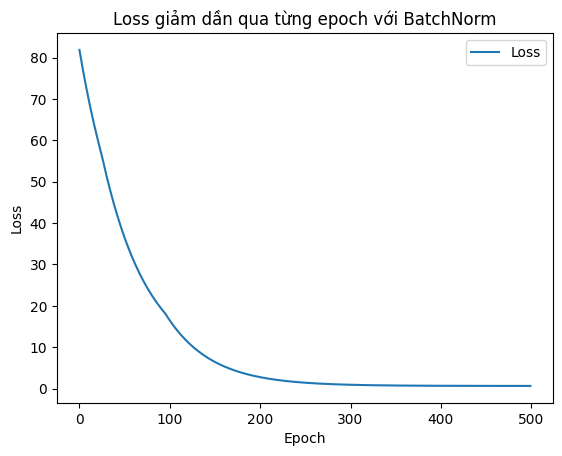

In [22]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Tạo input (1x3x3)
x = torch.tensor(
    [[[[1.0, 2, 3], [4, 5, 6], [7, 8, 9]]]], requires_grad=True
)  # Shape (1, 1, 3, 3)

# Tạo kernel (2x2) và BatchNorm
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=2, stride=1, bias=False)
batch_norm = nn.BatchNorm2d(1)  # Thêm BatchNorm
relu = nn.ReLU(inplace=True)

# Khởi tạo kernel với giá trị cụ thể
with torch.no_grad():
    conv.weight.copy_(torch.tensor([[[[1.0, -1], [2, 0]]]]))  # Shape (1, 1, 2, 2)

# Giả sử nhãn thật
y_true = torch.tensor([[[[5.0, 10], [14, 20]]]])

# Optimizer
optimizer = torch.optim.SGD(list(conv.parameters()) + list(batch_norm.parameters()), lr=0.01)

# Lưu lịch sử loss
loss_history = []

# Training loop
num_epochs = 500
for epoch in range(num_epochs):
    optimizer.zero_grad()  # Xóa gradient trước đó

    # Forward pass với BatchNorm
    output = conv(x)
    if epoch % 5 == 0:
        print(f"Epoch {epoch}: After Conv = {output}")
    output_bn = batch_norm(output)  # Áp dụng BatchNorm
    if epoch % 5 == 0:
        print(f"Epoch {epoch}: After BatchNorm = {output_bn}")
    output_rl = relu(output_bn)
    if epoch % 5 == 0:
        print(f"Epoch {epoch}: After ReLU = {output_rl}")

    # Tính loss (MSE)
    loss = torch.mean((output_rl - y_true) ** 2) / 2
    loss_history.append(loss.item())

    # Backward pass
    loss.backward()

    # Cập nhật trọng số
    optimizer.step()

    # In loss mỗi 5 epoch
    if epoch % 5 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item()}")

# Vẽ đồ thị loss
plt.plot(loss_history, label="Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss giảm dần qua từng epoch với BatchNorm")
plt.legend()
plt.show()


Input 1x3x3(CxHxW) => Kernel 3x1x2x2 (NxCxHxW) => Conv 3x2x2 => BatchNorm 3x2x2 => ReLU 3x2x2

Epoch 0: After Conv = tensor([[[[ 7.,  9.],
          [13., 15.]],

         [[-4., -3.],
          [-1.,  0.]],

         [[ 8., 10.],
          [14., 16.]]]], grad_fn=<ConvolutionBackward0>)
Epoch 0: After BatchNorm = tensor([[[[-1.2649, -0.6325],
          [ 0.6325,  1.2649]],

         [[-1.2649, -0.6325],
          [ 0.6325,  1.2649]],

         [[-1.2649, -0.6325],
          [ 0.6325,  1.2649]]]], grad_fn=<NativeBatchNormBackward0>)
Epoch 0: After ReLU = tensor([[[[0.0000, 0.0000],
          [0.6325, 1.2649]],

         [[0.0000, 0.0000],
          [0.6325, 1.2649]],

         [[0.0000, 0.0000],
          [0.6325, 1.2649]]]], grad_fn=<ReluBackward0>)
Epoch 0: Loss = 81.83686065673828
Epoch 100: After Conv = tensor([[[[ 7.0000e+00,  9.0000e+00],
          [ 1.3000e+01,  1.5000e+01]],

         [[-3.9998e+00, -2.9997e+00],
          [-9.9955e-01,  5.2404e-04]],

         [[ 8.0000e+00,  1.0000e+01],
          [ 1.4000e+01,  1.6000e+01]]]], grad_fn=<ConvolutionBackward0>)
Epoch 100:

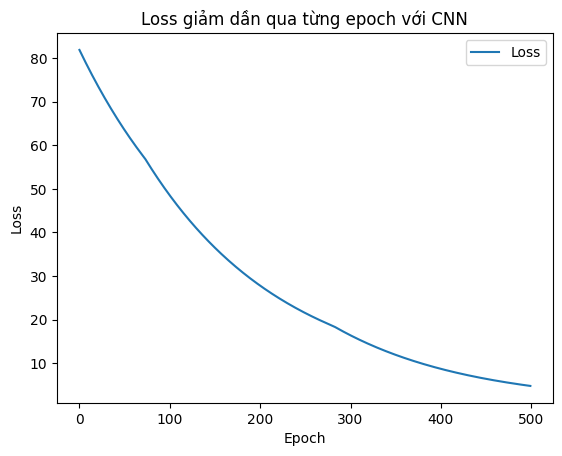

In [31]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Tạo input (1x3x3)
x = torch.tensor(
    [[[[1.0, 2, 3], [4, 5, 6], [7, 8, 9]]]], requires_grad=True
)  # Shape: (1, 1, 3, 3)

# Tạo kernel (2x2) và BatchNorm
conv = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=2, stride=1, bias=False)
batch_norm = nn.BatchNorm2d(3)  # Thêm BatchNorm
relu = nn.ReLU(inplace=True)

# Khởi tạo kernel với giá trị cụ thể (Shape: 3x1x2x2)
with torch.no_grad():
    conv.weight = nn.Parameter(
        torch.tensor(
            [
                [[[1.0, -1], [2, 0]]],  # Kernel 1
                [[[2.0, 1], [-2, 0]]],  # Kernel 2
                [[[1.0, -1], [1, 1]]],  # Kernel 3
            ]
        )
    )

# Giả sử nhãn thật
y_true = torch.tensor([[[[5.0, 10], [14, 20]]]])

# Optimizer
optimizer = torch.optim.SGD(
    list(conv.parameters()) + list(batch_norm.parameters()), lr=0.01
)

# Lưu lịch sử loss
loss_history = []

# Training loop
num_epochs = 500
for epoch in range(num_epochs):
    optimizer.zero_grad()  # Xóa gradient trước đó

    # Forward pass với BatchNorm
    output = conv(x)
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: After Conv = {output}")

    output_bn = batch_norm(output)  # Áp dụng BatchNorm
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: After BatchNorm = {output_bn}")

    output_rl = relu(output_bn)
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: After ReLU = {output_rl}")

    # Tính loss (MSE)
    loss = torch.mean((output_rl - y_true) ** 2) / 2
    loss_history.append(loss.item())

    # Backward pass
    loss.backward()

    # Cập nhật trọng số
    optimizer.step()

    # In loss mỗi 100 epoch
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item()}")

# Vẽ đồ thị loss
plt.plot(loss_history, label="Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss giảm dần qua từng epoch với CNN")
plt.legend()
plt.show()


Input 3x3x3(CxHxW) => Kernel 3x3x2x2 (NxCxHxW) => Conv 3x2x2 => BatchNorm 3x2x2 => ReLU 3x2x2

Epoch 0: After Conv = tensor([[[[ 8.5000, 10.5000],
          [14.5000, 16.5000]],

         [[ 1.5000,  2.0000],
          [ 3.5000,  4.0000]],

         [[ 6.5000,  8.5000],
          [12.5000, 14.5000]]]], grad_fn=<ConvolutionBackward0>)
Epoch 0: After BatchNorm = tensor([[[[-1.2649, -0.6325],
          [ 0.6325,  1.2649]],

         [[-1.2127, -0.7276],
          [ 0.7276,  1.2127]],

         [[-1.2649, -0.6325],
          [ 0.6325,  1.2649]]]], grad_fn=<NativeBatchNormBackward0>)
Epoch 0: After ReLU = tensor([[[[0.0000, 0.0000],
          [0.6325, 1.2649]],

         [[0.0000, 0.0000],
          [0.7276, 1.2127]],

         [[0.0000, 0.0000],
          [0.6325, 1.2649]]]], grad_fn=<ReluBackward0>)
Epoch 0: Loss = 81.81290435791016
Epoch 5: After Conv = tensor([[[[ 8.5066, 10.5066],
          [14.5110, 16.5110]],

         [[ 1.5273,  2.0173],
          [ 3.5024,  3.9924]],

         [[ 6.5066,  8.5066],
          [12.5110, 14.5110]]]], grad_fn=<ConvolutionBackward0>)
Epoch 5: Aft

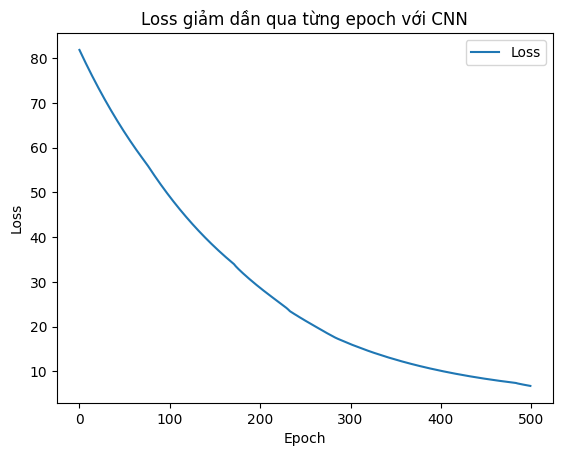

In [32]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Tạo input (3x3x3)
x = torch.tensor(
    [
        [
            [[1.0, 2, 3], [4, 5, 6], [7, 8, 9]],  # Channel 1
            [[9.0, 8, 7], [6, 5, 4], [3, 2, 1]],  # Channel 2
            [[1.0, 1, 1], [2, 2, 2], [3, 3, 3]],  # Channel 3
        ]
    ],
    requires_grad=True,
)


# Tạo kernel (2x2) và BatchNorm
conv = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=2, stride=1, bias=False)
batch_norm = nn.BatchNorm2d(3)  # Thêm BatchNorm
relu = nn.ReLU(inplace=True)

# Khởi tạo kernel với giá trị cụ thể Shape (3, 3, 2, 2)
with torch.no_grad():
    conv.weight = nn.Parameter(
        torch.tensor(
            [
                [
                    [[1.0, -1], [2, 0]],
                    [[0.5, -0.5], [1, -1]],
                    [[-1, 1], [0.5, -0.5]],
                ],  # Kernel 1
                [
                    [[2.0, 1], [-2, 0]],
                    [[1.5, -1], [-0.5, 0.5]],
                    [[0, 0.5], [-1, 1]],
                ],  # Kernel 2
                [
                    [[1.0, -1], [2, 0]],
                    [[-1, 1], [0.5, -0.5]],
                    [[2, -2], [1, -1]],
                ],  # Kernel 3
            ]
        )
    )

# Giả sử nhãn thật
y_true = torch.tensor([[[[5.0, 10], [14, 20]]]])

# Optimizer
optimizer = torch.optim.SGD(list(conv.parameters()) + list(batch_norm.parameters()), lr=0.01)

# Lưu lịch sử loss
loss_history = []

# Training loop
num_epochs = 500
for epoch in range(num_epochs):
    optimizer.zero_grad()  # Xóa gradient trước đó

    # Forward pass với BatchNorm
    output = conv(x)
    if epoch % 5 == 0:
        print(f"Epoch {epoch}: After Conv = {output}")
    output_bn = batch_norm(output)  # Áp dụng BatchNorm
    if epoch % 5 == 0:
        print(f"Epoch {epoch}: After BatchNorm = {output_bn}")
    output_rl = relu(output_bn)
    if epoch % 5 == 0:
        print(f"Epoch {epoch}: After ReLU = {output_rl}")

    # Tính loss (MSE)
    loss = torch.mean((output_rl - y_true) ** 2) / 2
    loss_history.append(loss.item())

    # Backward pass
    loss.backward()

    # Cập nhật trọng số
    optimizer.step()

    # In loss mỗi 5 epoch
    if epoch % 5 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item()}")

# Vẽ đồ thị loss
plt.plot(loss_history, label="Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss giảm dần qua từng epoch với CNN")
plt.legend()
plt.show()


Test Input(3x3x3) với CNN

Epoch 0: After Conv = tensor([[[[ 8.5000, 10.5000],
          [14.5000, 16.5000]],

         [[ 1.5000,  2.0000],
          [ 3.5000,  4.0000]],

         [[ 6.5000,  8.5000],
          [12.5000, 14.5000]]]], grad_fn=<ConvolutionBackward0>)
Epoch 0: After BatchNorm = tensor([[[[-1.2649, -0.6325],
          [ 0.6325,  1.2649]],

         [[-1.2127, -0.7276],
          [ 0.7276,  1.2127]],

         [[-1.2649, -0.6325],
          [ 0.6325,  1.2649]]]], grad_fn=<NativeBatchNormBackward0>)
Epoch 0: After ReLU = tensor([[[[0.0000, 0.0000],
          [0.6325, 1.2649]],

         [[0.0000, 0.0000],
          [0.7276, 1.2127]],

         [[0.0000, 0.0000],
          [0.6325, 1.2649]]]], grad_fn=<ReluBackward0>)
Epoch 0: After Dropout = tensor([[[[0.0000, 0.0000],
          [1.2649, 0.0000]],

         [[0.0000, 0.0000],
          [1.4552, 2.4253]],

         [[0.0000, 0.0000],
          [0.0000, 0.0000]]]], grad_fn=<MulBackward0>)
Epoch 0: After MaxPool = tensor([[[[1.2649]],

         [[2.425

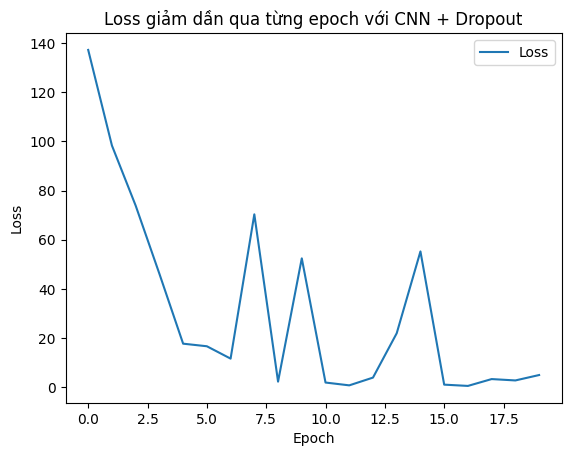

In [51]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


# Định nghĩa mô hình CNN với Dropout
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=2, stride=1, bias=False)
        self.bn = nn.BatchNorm2d(3)
        self.relu = nn.ReLU(inplace=True)
        self.dropout = nn.Dropout(p=0.5)  # Dropout với xác suất tắt 50%
        self.pool = nn.MaxPool2d(2, 2)
        self.fc = nn.Linear(3 * 1 * 1, 1)  # Fully connected layer

    def forward(self, x, num_epoch):
        self.num_epoch = num_epoch
        x = self.conv(x)
        print(f"Epoch {self.num_epoch}: After Conv = {x}")
        x = self.bn(x)
        print(f"Epoch {self.num_epoch}: After BatchNorm = {x}")
        x = self.relu(x)
        print(f"Epoch {self.num_epoch}: After ReLU = {x}")
        x = self.dropout(x)  # Thêm Dropout sau ReLU
        print(f"Epoch {self.num_epoch}: After Dropout = {x}")
        x = self.pool(x)
        print(f"Epoch {self.num_epoch}: After MaxPool = {x}")
        x = x.view(x.size(0), -1)  # Flatten
        print(f"Epoch {self.num_epoch}: After Flatten = {x}")
        x = self.fc(x)
        print(f"Epoch {self.num_epoch}: After Fully Connected = {x}")
        return x


# Khởi tạo mô hình
model = CNN()

# Tạo dữ liệu đầu vào (3x3x3)
x = torch.tensor(
    [
        [
            [[1.0, 2, 3], [4, 5, 6], [7, 8, 9]],  # Channel 1
            [[9.0, 8, 7], [6, 5, 4], [3, 2, 1]],  # Channel 2
            [[1.0, 1, 1], [2, 2, 2], [3, 3, 3]],  # Channel 3
        ]
    ],
    requires_grad=True,
)

# Khởi tạo kernel với giá trị cụ thể Shape (3, 3, 2, 2)
with torch.no_grad():
    model.conv.weight = nn.Parameter(
        torch.tensor(
            [
                [
                    [[1.0, -1], [2, 0]],
                    [[0.5, -0.5], [1, -1]],
                    [[-1, 1], [0.5, -0.5]],
                ],  # Kernel 1
                [
                    [[2.0, 1], [-2, 0]],
                    [[1.5, -1], [-0.5, 0.5]],
                    [[0, 0.5], [-1, 1]],
                ],  # Kernel 2
                [
                    [[1.0, -1], [2, 0]],
                    [[-1, 1], [0.5, -0.5]],
                    [[2, -2], [1, -1]],
                ],  # Kernel 3
            ]
        )
    )

# Giả sử nhãn thật
y_true = torch.tensor([[10.0]])  # Dự đoán giá trị số thực (1 giá trị)

# Loss & Optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
num_epochs = 20
loss_history = []

for epoch in range(num_epochs):
    model.train()  # Bật Dropout trong Training mode
    optimizer.zero_grad()  # Xóa gradient trước đó

    # Forward pass
    output = model(x, epoch)
    loss = criterion(output, y_true)
    loss_history.append(loss.item())

    # Backward pass
    loss.backward()
    optimizer.step()

    # In loss mỗi 5 epoch
    if epoch % 5 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item()}")

# Vẽ đồ thị loss
plt.plot(loss_history, label="Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss giảm dần qua từng epoch với CNN + Dropout")
plt.legend()
plt.show()


In [44]:
import torch
import torch.nn as nn

# Khởi tạo một tensor đầu vào (giả sử đầu ra của một lớp FC)
x = torch.ones(5, 5)  # Ma trận 5x5 toàn số 1

# Khởi tạo lớp Dropout với p=0.5 (tắt 50% neurons)
dropout = nn.Dropout(p=0.8)

# Kết quả khi chưa qua Dropout
print("Before Dropout:\n", x)

# Áp dụng Dropout trong chế độ huấn luyện
x_dropout = dropout(x)
print("After Dropout (Training Mode):\n", x_dropout)

# Chuyển sang chế độ kiểm tra (inference)
dropout.eval()  # Tắt Dropout (không loại bỏ neurons)
x_eval = dropout(x)
print("After Dropout (Inference Mode):\n", x_eval)


Before Dropout:
 tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])
After Dropout (Training Mode):
 tensor([[0., 0., 0., 0., 0.],
        [5., 0., 0., 0., 0.],
        [5., 0., 0., 0., 5.],
        [0., 0., 5., 5., 0.],
        [0., 0., 0., 5., 0.]])
After Dropout (Inference Mode):
 tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])
